# Traditional Classifiers
Classification problems have long been at the heart of applied statistics, but it wasn't until the advent of the computer that their power really began to manifest.  Some of the simplest algorithms are Naive Bayes, K-nearest Neighbors, and Logistic Regression.  Calling these algorithms "simple" by no means implies that they are ineffective, in fact, due to their simplicity and speed, they are often employed in workflows.  In this exercise we'll explore these classifiers and compare the performance against one another.

## Naive Bayes
Naive Bayes classifiers have been studied extensively since the 1950s and 1960s, notably in the domain of text classification, being especially useful for email spam detection.  They work by assuming a prior probability distribution in each of the classes, and then update each distribution given the training data using Bayes's Theorem given by $${\displaystyle p(C_{k}\mid \mathbf {x} )={\frac {p(C_{k})\ p(\mathbf {x} \mid C_{k})}{p(\mathbf {x} )}}\,}$$ where $C_{k}$ is the kth class, and $x$ is the training data.  The "naive" part of the algorithm comes into play with the assumption that each data point is independent of the previous, leading to the nice property that the joint pobability can be computed as the simple product.  New data is then classified by implementing a decision rule, typically the probabiliy of the new data point belonging to each class is computed and the largest is chosen.

1. Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [SMS Spam Collection Data Set](http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#), put it into a dataframe, process it as a bag-of-words using word counts, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.
1. Which of the available Naive Bayes Classifiers is most appropriate to the data?  Choose one and fit it to the data, using the default hyperparameter settings, and report the training and testing accuracies.  Comment on your results.
1. Try a few different settings of the `alpha` parameter, printing the training and testing accuracies.  Also try switching the `fit_prior` parameter on and off.  Comment on your results.
1. Generate a word cloud for the `ham` and `spam` words.
1. Naive Bayes can also be used for classification of continous data.  Generate a set of random data points, $x1$ and $x2$, classifiying each point as being above or below the line `f(x) = x`, fit a Naive Bayes model, report the accuracy, and plot the decision boundary.  Comment on your results.

In [1]:
# Part 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Import data
col_names = ['cat', 'sms']
data = pd.read_csv('./data/SMSSpamCollection', sep = '\t', names = col_names, encoding='latin-1')

In [2]:
data.head()

,cat,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.describe()

,cat,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['sms'], data['cat'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)
# Tokenize to counts - for working with text classification
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [6]:
# Part 2
from sklearn.naive_bayes import MultinomialNB

# Fit model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Report accuracies
train_acc = nb.score(X_train, y_train)
test_acc = nb.score(X_test, y_test)

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)


Train accuracy: 0.993269015033
Test accuracy: 0.987443946188


####  In this case, since we are using word counts, our features are all multinomial. Therefore, using a multinomial Naive Bayes classifier is most appropriate. Even with just using the default parameters, we have pretty good accuracy. 

In [7]:
# Part 3
# The alpha parameter adds a smoothing - when we have a zero count or value in the training set,
# we will add one to it so it won't appear that there is a zero probability. 
a_vals = np.logspace(-9, 3, 13)

# Perform fits in loop first with fit_prior on 
for a in a_vals:
    nb = MultinomialNB(alpha = a, fit_prior = True)
    nb.fit(X_train, y_train)
    
    train_acc = nb.score(X_train, y_train)
    test_acc = nb.score(X_test, y_test)
    
    print('alpha: ', a)
    print('Train accuracy: ', train_acc)
    print('Test accuracy: ', test_acc, '\n')

alpha:  1e-09
Train accuracy:  0.998653803007
Test accuracy:  0.984753363229 

alpha:  1e-08
Train accuracy:  0.998653803007
Test accuracy:  0.984753363229 

alpha:  1e-07
Train accuracy:  0.998653803007
Test accuracy:  0.985650224215 

alpha:  1e-06
Train accuracy:  0.998653803007
Test accuracy:  0.985650224215 

alpha:  1e-05
Train accuracy:  0.998429436841
Test accuracy:  0.986547085202 

alpha:  0.0001
Train accuracy:  0.998205070675
Test accuracy:  0.985650224215 

alpha:  0.001
Train accuracy:  0.997756338344
Test accuracy:  0.985650224215 

alpha:  0.01
Train accuracy:  0.997756338344
Test accuracy:  0.985650224215 

alpha:  0.1
Train accuracy:  0.996634507516
Test accuracy:  0.985650224215 

alpha:  1.0
Train accuracy:  0.993269015033
Test accuracy:  0.987443946188 

alpha:  10.0
Train accuracy:  0.962979582679
Test accuracy:  0.959641255605 

alpha:  100.0
Train accuracy:  0.878169172089
Test accuracy:  0.866367713004 

alpha:  1000.0
Train accuracy:  0.868297060803
Test accur

####  when the smoothing is low, the accuracy is not affected, however, when the smoothing increases, the accuracy suffers

In [8]:
# Part 4
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Split ham and spam rows
ham = data[data.cat == 'ham'].sms
spam = data[data.cat == 'spam'].sms

# Get counts, removing stopwords
ham_words = ''
for row in ham:
    text = row.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ''
        
spam_words = ''
for row in spam:
    text = row.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ''
        
# Generate a word cloud image
ham_wordcloud = WordCloud(width = 600, height = 400).generate(ham_words)
spam_wordcloud = WordCloud(width = 600, height = 400).generate(spam_words)


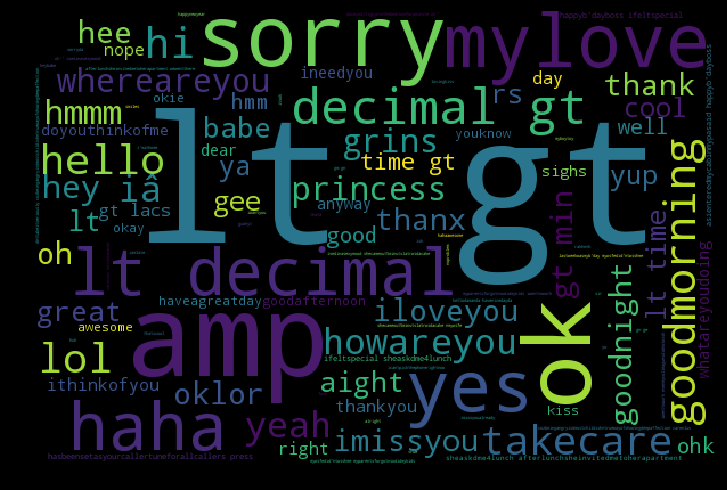

In [9]:
# Show ham image
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

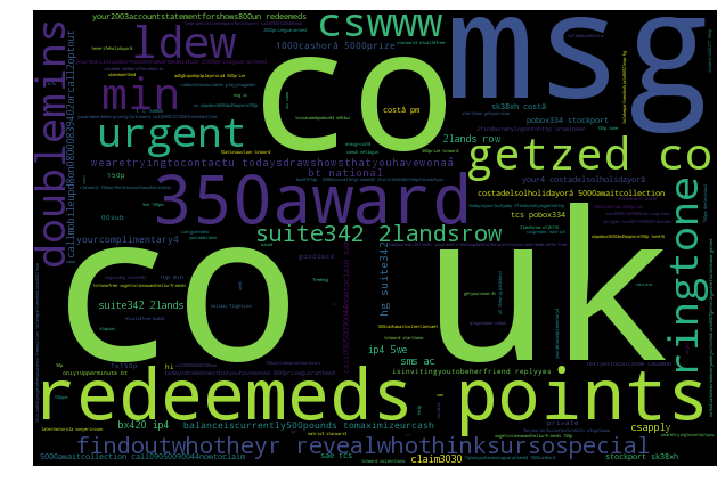

In [10]:
# Show spam image
plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [11]:
# Part 5

# Naive Bayes can also be used for classification of continous data. 
# Generate a set of random data points, x1x1  and  x2x2 , classifiying each point as being
# above or below the line f(x) = x, fit a Naive Bayes model, report the accuracy, and plot
# the decision boundary. Comment on your results.

x1 = np.random.randn(100)
x2 = np.random.randn(100)

df = pd.DataFrame({'x1': x1, 'x2': x2})
df['y'] = x2 >= x1

df.head()

,x1,x2,y
0,0.956239,-0.039660,False
1,-1.160001,-0.037929,True
2,-0.444786,2.032063,True
3,-0.931110,-0.794967,True
4,-0.186546,0.938041,True


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['y'],  
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
train_acc = gnb.score(X_train, y_train)
test_acc = gnb.score(X_test, y_test)

print('train accuracy: ', train_acc, 'test accuracy: ', test_acc)

train accuracy:  0.975 test accuracy:  0.9


In [14]:
# Plot the decision boundary 
# make a plotting function for plotting simplicity

from matplotlib.colors import ListedColormap

def makePlot(clf, X, y, title = 'Decision Boundary', size = 4, h = 0.02):
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    plt.clf()
    
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, zorder=10, cmap=cm_bright, 
               edgecolor='k')
    
    plt.axis('tight')
    x_min = -size
    x_max = size
    y_min = -size
    y_max = size
    
    XX, YY = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])[:, 1]
    else:
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:, 1]
        
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, cmap=plt.cm.RdBu, alpha=.8)
    
    plt.title(title)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

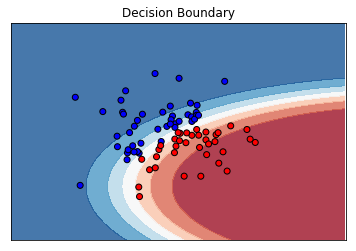

In [15]:
# Plot with decision boundary
makePlot(gnb, X_train, y_train)

## K-Nearest Neighbor
Another one of the simplest of classificaiton algorithms is the K-Neareast Neighbors.  KNN works by simply classifying a datapoint by its proximity to other datapoints of known category.  There are a few different evaluation metrics to choose for "distance" as well as different implementations of the algorithm, but the idea is always the same.

1. Generate a set of 100 random data points according to the function ${\displaystyle f(x) = N(x\;|\;\mu ,\sigma ^{2}) + \epsilon}$ where $\mu = 0$, $\sigma = 1$, and $\epsilon$ is a noise term.  Then classify each point as being above or below the curve, fit a KNN classifier, using the default values, and plot the decision boundary and report the accuracy.  Comment on your results.
1. Using the data generated in part (1), fit a series of KNN models, adjusting the `n_neighbors` parameter, and plot the decision boundary and accuracy for each.  Comment on your results.
1. Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Connectionist Bench (Sonar, Mines vs. Rocks) Data Set](http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/), put it into a data frame, and split into training and testing sets.  Be sure to familiarize yourself with the data before proceeding.
1. Fit a KNN classifier using the default settings and report the training and testing accuracies.
1. Fit a series of KNN classifiers to the data, adjusting the `n_neighbors` parameter, reporting the training and testing accuracies for each.  Comment on your results.
1. Repeat part (5), but this time adjusting the `metric` parameter.  Comment on your results.

In [16]:
# Part 1
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier

# Generate data 
np.random.seed(2)
n = 100
x = np.linspace(-3, 3, n)
y = norm.pdf(x) + 0.5 * np.random.randn(n)

# Classify points
cat = y < norm.pdf(x)

# Put into df for convenience
data = pd.DataFrame({'x': x, 'y': y, 'cat': cat})

data.head()

,cat,x,y
0,True,-3.000000,-0.203947
1,True,-2.939394,-0.022828
2,True,-2.878788,-1.061769
3,False,-2.818182,0.827657
4,True,-2.757576,-0.887812


In [17]:
# Fit KNN model 
knn = KNeighborsClassifier()
knn.fit(data[['x', 'y']], data.cat)

# Report accuracy
knn.score(data[['x', 'y']], data['cat'])

0.93000000000000005

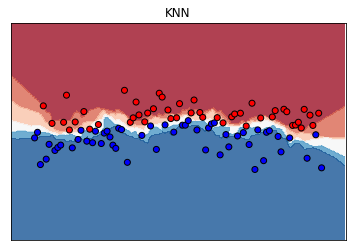

In [18]:
makePlot(knn, data[['x', 'y']], data['cat'], title = 'KNN', size = 3.5)

k:  1 accuracy:  1.0


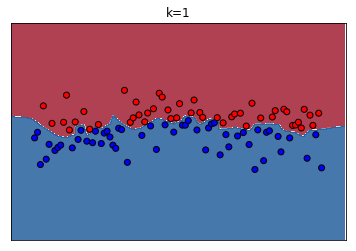

k:  2 accuracy:  0.95


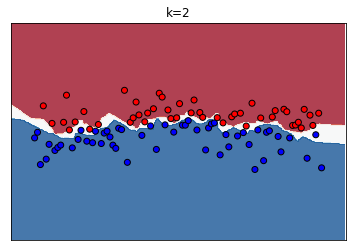

k:  3 accuracy:  0.96


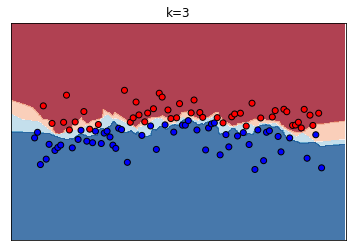

k:  4 accuracy:  0.94


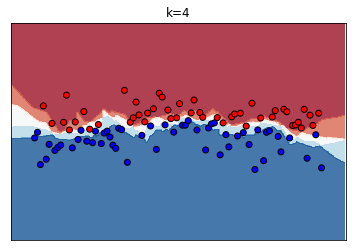

k:  5 accuracy:  0.93


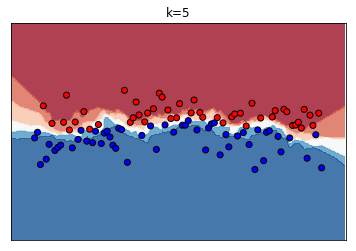

k:  6 accuracy:  0.91


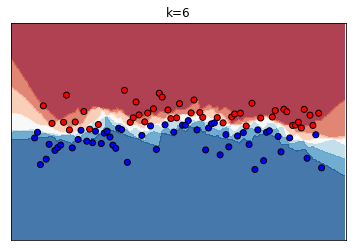

k:  7 accuracy:  0.93


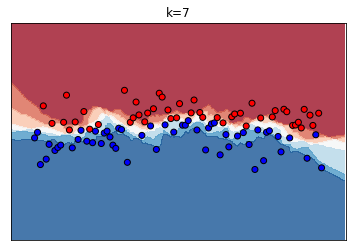

k:  8 accuracy:  0.91


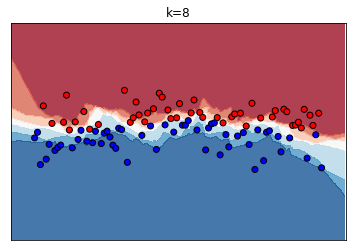

k:  9 accuracy:  0.92


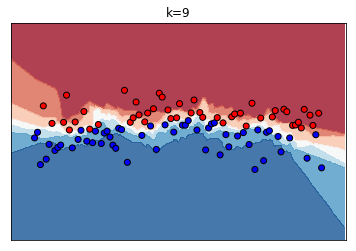

k:  10 accuracy:  0.91


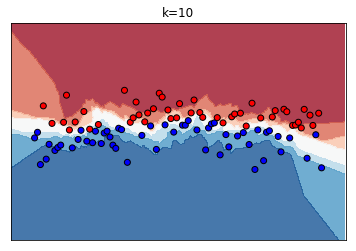

k:  11 accuracy:  0.9


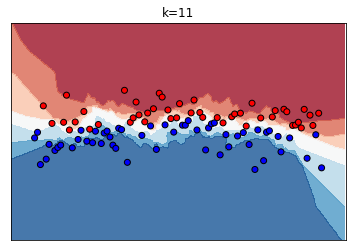

k:  12 accuracy:  0.91


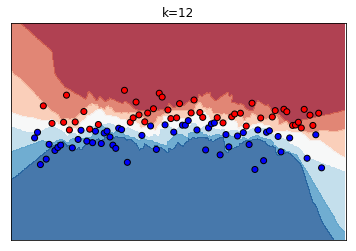

k:  13 accuracy:  0.9


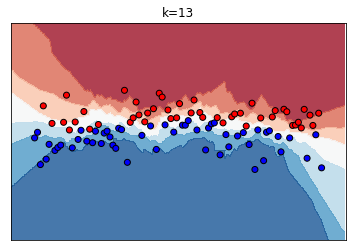

k:  14 accuracy:  0.91


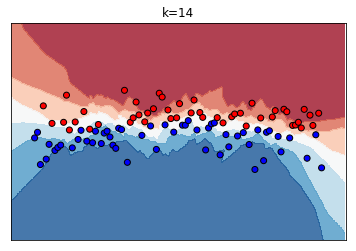

k:  15 accuracy:  0.9


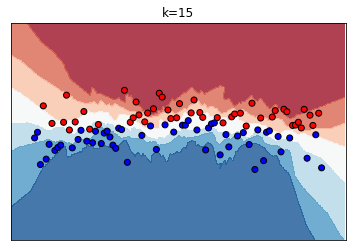

k:  16 accuracy:  0.89


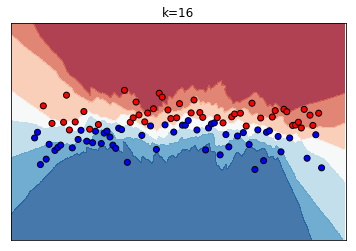

k:  17 accuracy:  0.88


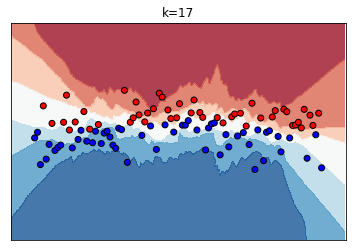

k:  18 accuracy:  0.83


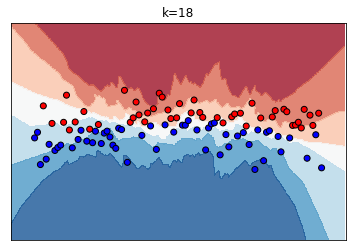

k:  19 accuracy:  0.82


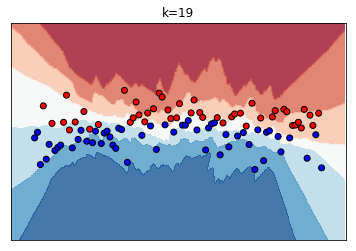

In [19]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data[['x', 'y']], data['cat'])
    
    score = knn.score(data[['x', 'y']], data['cat'])
    
    print('k: ', i, 'accuracy: ', score)
    makePlot(knn, data[['x', 'y']], data['cat'], title = 'k={}'.format(i), size=3.5)

In [20]:
# Part 3
from sklearn.model_selection import train_test_split

# Import data 
data = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', 
                  header=None, sep=',')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(60, axis=1), data[60], test_size = 0.2)

In [22]:
data.shape

(208, 61)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print('accuracy: ', accuracy)

accuracy:  0.857142857143


In [24]:
# Fit a series of KNN classifiers to the data, adjusting the n_neighbors parameter, reporting
# the training and testing accuracies for each. Comment on your results.

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    print('k: ', i, 'test accuracy: ', test_acc, 'train accuracy', train_acc)

k:  1 test accuracy:  0.833333333333 train accuracy 1.0
k:  2 test accuracy:  0.833333333333 train accuracy 0.921686746988
k:  3 test accuracy:  0.833333333333 train accuracy 0.909638554217
k:  4 test accuracy:  0.833333333333 train accuracy 0.849397590361
k:  5 test accuracy:  0.857142857143 train accuracy 0.867469879518
k:  6 test accuracy:  0.761904761905 train accuracy 0.83734939759
k:  7 test accuracy:  0.761904761905 train accuracy 0.813253012048
k:  8 test accuracy:  0.714285714286 train accuracy 0.771084337349
k:  9 test accuracy:  0.714285714286 train accuracy 0.765060240964
k:  10 test accuracy:  0.642857142857 train accuracy 0.746987951807
k:  11 test accuracy:  0.666666666667 train accuracy 0.704819277108
k:  12 test accuracy:  0.690476190476 train accuracy 0.728915662651
k:  13 test accuracy:  0.642857142857 train accuracy 0.692771084337
k:  14 test accuracy:  0.690476190476 train accuracy 0.704819277108
k:  15 test accuracy:  0.666666666667 train accuracy 0.704819277108
k

In [25]:
# the most accuracte model is at k=5, after 5, the test accuracy decreases. The train accuracy
# is highest at k=1

In [26]:
# Part 6
# Repeat part (5), but this time adjusting the metric parameter. Comment on your results.
for m in ['euclidean', 'manhattan', 'chebyshev']:
    knn = KNeighborsClassifier(metric=m)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    print('m: ', m, 'test_acc: ', test_acc, 'train_acc: ', train_acc)

m:  euclidean test_acc:  0.857142857143 train_acc:  0.867469879518
m:  manhattan test_acc:  0.857142857143 train_acc:  0.89156626506
m:  chebyshev test_acc:  0.809523809524 train_acc:  0.801204819277


## Logistic Regression
The final classification algorithm we'll work with here is Logistic Regression.  As its name implies, this technique makes use of the Logistic Function given by $$\sigma (t)={\frac {e^{t}}{e^{t}+1}}={\frac {1}{1+e^{-t}}}$$ which forms a bit of an S-shaped curve.  The intuition behind the this model is that, given a set of predictor variables, we want our response to collapse to a binary output, `0` or `1`.  As it turns out, this technique, although one of the oldest, tends to provide good results in a variety of problems, and is lightweight.

1. Create a set of 100 random datapoints separated by the line $f(x) = x + \epsilon$, where $\epsilon$ is a noise term, classifying points as lying above or below the curve.  Fit a Logistic Regression model to your data, report the accuracy, and plot the decision boundary.  Comment on your results.
1. Repeat part (1), but this time having $f(x) = sin(x) + \epsilon$.
1. Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Chronic_Kidney_Disease Data Set](http://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease), put it into a data frame, drop all categorical variables, and split into training and testing sets.  Be sure to familiarize yourself with the data before proceeding.
1. Fit a Logistic Regression model to the data, report the training and testing accuracies, and comment on your results.
1. Fit a series of Logistic Regression models for different values of the `C` hyperparameter of differing orders of magnitude, reporting the training and testing accuracies of each.  Comment on your results.
1. Experiment with different parameter settings to see if you can improve classification.  Be sure to report the training and testing accuracies and comment on your results.

In [27]:
# Part 1
# Create a set of 100 random datapoints separated by the line  f(x) = x + e, where  e  is
# a noise term, classifying points as lying above or below the curve. Fit a Logistic 
# Regression model to your data, report the accuracy, and plot the decision boundary. Comment
# on your results.

from sklearn.linear_model import LogisticRegression

# Generate data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = x + 0.25 * np.random.randn(100)

# Classify points
cat = y < x

# Put into a data frame
data = pd.DataFrame({'x': x, 'y': y, 'cat': cat})
data.head()

,cat,x,y
0,False,-3.000000,-2.558987
1,False,-2.939394,-2.839355
2,False,-2.878788,-2.634103
3,False,-2.818182,-2.257959
4,False,-2.757576,-2.290686


In [28]:
lm = LogisticRegression()
lm.fit(data[['x', 'y']], cat)

# Report accuracy
print('Accuracy: ', lm.score(data[['x', 'y']], cat))

Accuracy:  0.96


In [29]:
# Plot
makePlot(lm, data[['x', 'y']], data['cat'])

IndexError: too many indices for array

In [ ]:
# Part 2
# Repeat part (1), but this time having  f(x)=sin(x)+ϵ.

x = np.linspace(np.pi, np.pi, 100)
y = np.sin(x) + 0.25 * np.random.randn(100)

cat = y < np.sin(x)

data = pd.DataFrame({'x': x, 'y': y, 'cat': cat})
data.head()

In [ ]:
lm = LogisticRegression()

lm.fit(data[['x', 'y']], cat)
accuracy = lm.score(data[['x', 'y']], cat)
print("Accuracy: ", accuracy)

In [ ]:
makePlot(lm, data[['x', 'y']], data['cat'])

In [30]:
# Head over to the Machine Learning Repository, download the Chronic_Kidney_Disease Data Set, 
# put it into a data frame, drop all categorical variables, and split into training and testing
# sets. Be sure to familiarize yourself with the data before proceeding.
from sklearn.model_selection import train_test_split

# Import Data
col_names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 
            'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn',
            'dm', 'cad', 'appet', 'pe', 'ane', 'cat']

data = pd.read_csv('./data/Chronic_Kidney_Disease/chronic_kidney_disease_full.arff', names=col_names).dropna()

# Drop categorical columns
data = data.drop(data.dtypes[data.dtypes == 'object'].index[:-1], axis=1)
data.head()

,cat
143,ckd
144,ckd
145,ckd
146,ckd
147,ckd


## Comparing Classifiers
As you may have suspected while working through the previous exercises, different algorithms are more suited to different kinds of problems which is what we will explore here.

1. Create a set of 100 datapoints which are linearly separable, classifying the data as being above or below the curve.  Fit a Naive Bayes, KNN, and Logistic Regression model to your data, reporting the accuracies and plotting the decision boundaries.  Comment on your results.
1. Create a set of 200 random data points that lie on a unit circle displaced by some noise, categorizing each as being inside or outside the circle.  Stated analytically, select $x$ and $y$ such that $x^2 + y^2 = 1 + \epsilon$ where $\epsilon$ is a noise term.  Fit a Naive Bayes, KNN, and Logistic Regression model to your data, reporting the accuracies and plotting the decision boundaries.  Comment on your results.
1. Using the `SMS Spam` data set above, fit a KNN and Logistic Regression model to the data and report your training and testing accuracies.  Comment on your results.
1. Using the `Sonar` data set above, fit a Naive Bayes and Logistic Regression model to the data and report your training and testing accuracies.  Comment on your results.
1. Using the `Kidney` data set above, fit a Naive Bayes and KNN model to the data and report your training and testing accuracies.  Comment on your results.  What can you say about your results overall in parts (3), (4), and (5)?